In [0]:
# 下載fasttext預訓練好的詞向量
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz  # wget會從網址下載檔案
!gunzip cc.en.300.bin.gz
! pip install langdetect  # 偵測語言

--2020-05-16 10:12:45--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 2606:4700:10::6816:4a8e, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G  14.1MB/s    in 5m 7s   

2020-05-16 10:17:53 (14.0 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]

     |████████████████████████████████| 983kB 2.7MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=75524d556cab14bb6c5c50b8f06f4f356f5edbed5dfd4e9a439c1304e8a98fcc
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [2]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

import spacy
#from gensim.models import FastText
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)  #讓future warning不要出現
from langdetect import detect

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:

df_reddit_all_fund = pd.read_csv("/content/drive/My Drive/野村_文字探勘_加減碼_組別一/Reddit/Reddit Data/keywords_all_fund.csv", encoding='utf-8')
df_reddit_all_fund['Content'] = df_reddit_all_fund['Content'].astype(str)
df_reddit_all_fund['Title'] = df_reddit_all_fund['Title'].astype(str)
df_reddit_all_fund

,Date,Name,Score,Title,Content
0,2020-03-12,__justsayin__,596,Fed to pump more than $500 billion into short-...,Dow up almost 1000 points in response...LOL\n\...
1,2020-03-16,cmbscredit,90,"I traded, managed a fixed income credit portfo...",I own my own firm that does proprietary invest...
2,2020-03-25,skilliard7,73,This crisis is a good example of why ETFs> Mut...,"With a mutual fund, you have absolutely 0 cont..."
3,2020-02-18,felloffaraptor,788,If there is a recession and I have super credi...,I would just pay off the loan to keep my credi...
4,2020-02-15,78523985210,433,Are index funds a foolproof way to become a mi...,I currently have $75k in VTSAX and because of ...
...,...,...,...,...,...
244,2020-03-04,ChocolateTsar,427,"Robinhood offers $15 discount, blames outage o...",>The $912 million-funded fintech giant will pr...
245,2020-01-20,UKARCADIA,0,Breakdown and allocation of funds,"Hello, is this a good selection of funds / ass..."
246,2019-12-17,EPIC_FAIL_73,5,I wish they made slightly leveraged (10-25%) i...,nan
247,2019-09-03,tssenek,149,Pension Funds Are Going To Be Destroyed In The...,"I thought about posting the link, but I can un..."


In [0]:
import re
import chardet

# 內文去除 url
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

def remove_num(text_list):
  remove_list = []
  err_list = []
  for i in range(len(text_list)):
    for j,jitem in enumerate((text_list[i])):
      if str(jitem) in "0123456789":
        remove_list.append(text_list[i])
        break
  
  for i in range(len(remove_list)):
    text_list.remove(remove_list[i])

  return text_list

In [6]:
df_reddit_all_fund = df_reddit_all_fund[['Date', 'Title', 'Content']]

df_reddit_all_fund['Content'] = df_reddit_all_fund['Content'].apply(lambda x: remove_urls(x) )
df_reddit_all_fund['Title'] = df_reddit_all_fund['Title'].apply(lambda x: remove_urls(x) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
df_reddit_all_fund = df_reddit_all_fund.dropna()
#df_reddit_all_fund['Title'] = df_reddit_all_fund['Title'].apply(lambda x: 0 if detect(str(x))!="en" else x)
drop_index = df_reddit_all_fund[df_reddit_all_fund['Title'] == 0].index
df_reddit_all_fund = df_reddit_all_fund.drop(drop_index, axis = 0)
print('無效報導筆數為 ：' + str(len(drop_index)))

df_reddit_all_fund = df_reddit_all_fund.reset_index(drop = True)
print(df_reddit_all_fund.shape)
df_reddit_all_fund.head()

無效報導筆數為 ：0
(249, 3)


,Date,Title,Content
0,2020-03-12,Fed to pump more than $500 billion into short-...,Dow up almost 1000 points in response...LOL\n\...
1,2020-03-16,"I traded, managed a fixed income credit portfo...",I own my own firm that does proprietary invest...
2,2020-03-25,This crisis is a good example of why ETFs> Mut...,"With a mutual fund, you have absolutely 0 cont..."
3,2020-02-18,If there is a recession and I have super credi...,I would just pay off the loan to keep my credi...
4,2020-02-15,Are index funds a foolproof way to become a mi...,I currently have $75k in VTSAX and because of ...


In [8]:
nlp = spacy.load('en_core_web_sm')
spacy_stopwords = list(spacy.lang.en.stop_words.STOP_WORDS)
symbols   = ['.', ',', '’','“','”','"', "''" ,"'",'*','``', '**','$','%','&','#','-','--',"''",'""','?', '!', ':', ';', '(', ')', '[', ']'\
             , '{', '}',"'s","'m","n't", "/",">","$","\n"]
rubbish_list = ['s', 't', 'ok', '‘', 'go', '4', 'tv', 'pg', 'e', 'k', '2', 'de', 'hp', 'eu', 'd', 'xl', 'o', 'er', 'ai', 'gm', '1', '23', \
                'ev', 've', '22', 'hq', 'dy', '86', 'cv', '98', 'bp', '15', 'l', 'p', '5', 'la', '40', '25', '14', 'sl', 'ge', '91', '11', \
                '81', 'm', 'll', '24', '3m', '3', 'ad', '41', '35', '10', '50', '18', 'oh', '55', '77', '7', '60', '90', '17', 'us', 'y', \
                '30', 'vw', 'ep', '20', 'pi', 'r', '16', '32', '46', '€1', 'mb', 'ha', '29', 'xi', 'ii', 'os', '93', 'uk', '6', 'a.', 'jp', \
                '5g', '78', '37', 'v.', 'c.', '84', '75', 'j.', 'ko', '38', 'va', '19', 'ho', 'ap', 'iq', '36', 'pc', 'dp', 'ut', 'j', '`', '34',\
                '45', 'al', 'p.', '70', 'le', '8', '12', 'lp', 'id', 'jr', '9', 'n', 'm.', 'z', 'rb', '21', 'gi', 'em', 'be', 'v', 'cj', 'fc', 'au'\
                , 'el', 'ab', '13', 'ya', '28', 'ww', 'ar', '82', '0', 'h', 'h.', '33', 's.', '5½', 'pb', '85', 'g', '26', '92', 'b', 'g.', 'mo', \
                'jv', '—', '80', '56', 'vr', 'rh', 'na', 'kb', 'un', '79', '83', '27','WSJ','-','am','pm','ET','wsj','et']
spacy_stopwords.extend(symbols+rubbish_list)
print('spaCy 語料庫擁有 {} 的斷字'.format(len(spacy_stopwords)))
print('前 5 個斷字為 {}'.format(spacy_stopwords[:5]))

spaCy 語料庫擁有 533 的斷字
前 5 個斷字為 ['for', 'along', 'almost', 'should', 'until']


In [9]:
def wsj_filter(text, stopword_list):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word.lower(),pos = 'n') for word in word_tokenize(str(text).lower()) if word not in stopword_list]

df_reddit_all_fund['title_edited'] = df_reddit_all_fund['Title'].apply(lambda text: wsj_filter(text,spacy_stopwords))
df_reddit_all_fund['content_edited'] = df_reddit_all_fund['Content'].apply(lambda text: wsj_filter(text,spacy_stopwords))
df_reddit_all_fund['title_edited'] = df_reddit_all_fund['title_edited'].apply(lambda x: remove_num(x))
df_reddit_all_fund['content_edited'] = df_reddit_all_fund['content_edited'].apply(lambda x: remove_num(x))

df_reddit_all_fund.head(20)

,Date,Title,Content,title_edited,content_edited
0,2020-03-12,Fed to pump more than $500 billion into short-...,Dow up almost 1000 points in response...LOL\n\...,"[fed, pump, billion, short-term, bank, funding...","[dow, point, response, ..., lol, context, size..."
1,2020-03-16,"I traded, managed a fixed income credit portfo...",I own my own firm that does proprietary invest...,"[traded, managed, fixed, income, credit, portf...","[firm, proprietary, investing, use, capital, d..."
2,2020-03-25,This crisis is a good example of why ETFs> Mut...,"With a mutual fund, you have absolutely 0 cont...","[crisis, good, example, etf, mutual, fund]","[mutual, fund, absolutely, control, price, buy..."
3,2020-02-18,If there is a recession and I have super credi...,I would just pay off the loan to keep my credi...,"[recession, super, credit, steady, job, reason...","[pay, loan, credit, active, debt, leave, money..."
4,2020-02-15,Are index funds a foolproof way to become a mi...,I currently have $75k in VTSAX and because of ...,"[index, fund, foolproof, way, millionaire]","[currently, vtsax, low, cost, living, allocate..."
5,2020-03-16,Fed says it will offer an additional $500 bill...,Oh boy...\n\n[-market-today-live.html](-market...,"[fed, say, offer, additional, billion, overnig...","[boy, ..., -market-today-live.html, -market-to..."
6,2020-03-25,Bonds and Bond Funds,Why exactly are bonds getting smoked? I know t...,"[bond, bond, fund]","[exactly, bond, getting, smoked, know, hide, a..."
7,2020-03-12,Many of my friends in the Investment Club are ...,I belong to an investment club connected with ...,"[friend, investment, club, cutting, loss, sell...","[belong, investment, club, connected, megachur..."
8,2020-03-23,Let’s talk about bond funds,Generally I invest in an allocation of total s...,"[let, talk, bond, fund]","[generally, invest, allocation, total, stock, ..."
9,2020-02-15,Michael Burry is suggesting passive index fund...,I’m currently looking at putting a 3-fund port...,"[michael, burry, suggesting, passive, index, f...","[currently, looking, putting, portfolio, etf, ..."


In [39]:
! pip install fasttext

In [10]:
# Fasttext斷字資料庫（預訓練好的300 dim 語料庫無法continue training）

import fasttext
import fasttext.util
ft = fasttext.load_model('cc.en.300.bin')
#ft.get_dimension()
fasttext.util.reduce_model(ft, 100) # 降到100維



100

In [11]:
df_reddit_all_fund = df_reddit_all_fund.sort_values(by='Date')
date_list = df_reddit_all_fund['Date'].dropna().drop_duplicates().tolist()

df_reddit_edited = df_reddit_all_fund[['Date','title_edited','content_edited']]
print(len(date_list))

df_get_vector = pd.DataFrame(columns = ['Date','Text'])

for item in date_list:
    a = df_reddit_all_fund.groupby('Date').get_group(item) # type = dataframe
    a = a.reset_index(drop = True)
    for i in range(len(a)):
      df_get_vector = df_get_vector.append({ 'Date': a.loc[i,'Date'], 
                             'Text': (a.loc[i,'title_edited'] + a.loc[i,'content_edited'])}, ignore_index = True)

df_get_vector

95


,Date,Text
0,2019-09-03,"[pension, fund, going, destroyed, recession, a..."
1,2019-09-04,"[big, short, michael, burry, explains, index, ..."
2,2019-09-29,"[fund, recommendation, vanguard, hello, r/inve..."
3,2019-10-08,"[index, fund, invest, trillion, rarely, challe..."
4,2019-10-21,"[netflix, raise, billion, debt, fund, massive,..."
...,...,...
244,2020-03-25,"[ackman, buy, hedge, close, buy, stock, letter..."
245,2020-03-25,"[donor, advised, fund, daf, quick, easy, tax, ..."
246,2020-03-25,"[lawmaker, agree, trillion, stimulus, early, m..."
247,2020-03-25,"[bond, bond, fund, exactly, bond, getting, smo..."


In [12]:
# get word vectors from pre-trained model from Facebook
# dim = 100
import numpy as np

df_get_vector['Vectors'] = 0
df_get_vector['Vectors Mean'] = 0
err = []

for i in range(len(df_get_vector)):
  sum1 = 0
  text_list = df_get_vector.loc[i,'Text']
  
  for j in range(len(text_list)):
    try:
      sum1 += ft.get_word_vector(text_list[j]) # a sparse matrix
    except Exception as e :
      print(i," ",e)
      err.append(text_list[j])

  df_get_vector.loc[i,'Vectors'] = sum1.sum()
  df_get_vector.loc[i,'Vectors Mean'] = np.mean(sum1)
df_get_vector

,Date,Text,Vectors,Vectors Mean
0,2019-09-03,"[pension, fund, going, destroyed, recession, a...",-3.631636,-0.036316
1,2019-09-04,"[big, short, michael, burry, explains, index, ...",4.624312,0.046243
2,2019-09-29,"[fund, recommendation, vanguard, hello, r/inve...",2.225386,0.022254
3,2019-10-08,"[index, fund, invest, trillion, rarely, challe...",7.542831,0.075428
4,2019-10-21,"[netflix, raise, billion, debt, fund, massive,...",-1.868972,-0.018690
...,...,...,...,...
244,2020-03-25,"[ackman, buy, hedge, close, buy, stock, letter...",-4.467340,-0.044673
245,2020-03-25,"[donor, advised, fund, daf, quick, easy, tax, ...",1.903181,0.019032
246,2020-03-25,"[lawmaker, agree, trillion, stimulus, early, m...",-2.899957,-0.029000
247,2020-03-25,"[bond, bond, fund, exactly, bond, getting, smo...",-0.676994,-0.006770


In [13]:
# fill missing date in  bench index data (holidays)
df_bench = pd.read_excel("/content/drive/My Drive/野村_文字探勘_加減碼_組別一/Aggregate Bond Index.xls")

length = len(df_bench)
i = 0
while i < length:
  if i>0 and (df_bench.loc[i,'Effective date '] - df_bench.loc[i-1,'Effective date ']) != pd.Timedelta(days= 1):
      df_bench = df_bench.append({ 'Effective date ': df_bench.loc[i-1,'Effective date '] + pd.Timedelta(days= 1),
                                   'S&P U.S. Aggregate Bond Index': df_bench.loc[i-1,'S&P U.S. Aggregate Bond Index']}, ignore_index = True)
      df_bench = df_bench.sort_values('Effective date ')
      df_bench = df_bench.reset_index(drop=True)
  i += 1
  length = len(df_bench)
pd.set_option('display.max_rows', None)
df_bench

,Effective date,S&P U.S. Aggregate Bond Index
0,2010-04-30,152.65
1,2010-05-01,152.65
2,2010-05-02,152.65
3,2010-05-03,152.34
4,2010-05-04,152.95
5,2010-05-05,153.33
6,2010-05-06,154.38
7,2010-05-07,153.76
8,2010-05-08,153.76
9,2010-05-09,153.76


In [0]:

df_get_vector['Bench'] = 0

for i in range(len(df_get_vector)):
  try:
    index = df_bench['Effective date '].astype(str).tolist().index(df_get_vector.loc[i,'Date'])
    df_get_vector.loc[i,'Bench'] = df_bench.loc[index, 'S&P U.S. Aggregate Bond Index']
  except Exception as e:
    print(e," ",df_get_vector.loc[i,'Date'])

bench peak index:  2020-03-06
vector trough index:  2020-02-27
bench trough index:  2020-03-19
vector peak index:  2020-03-13


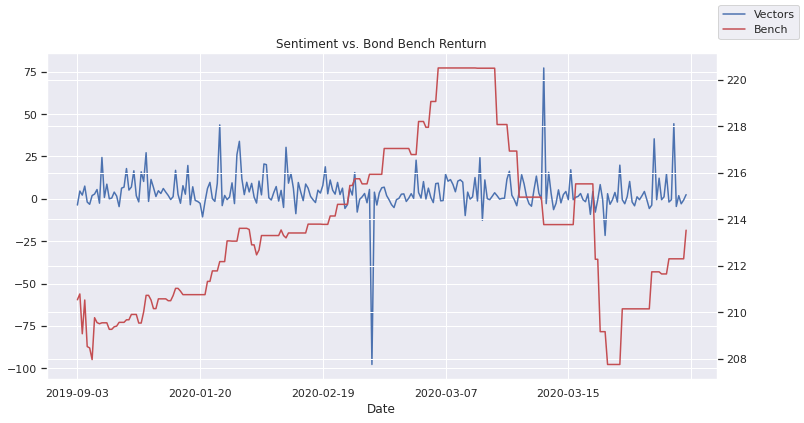

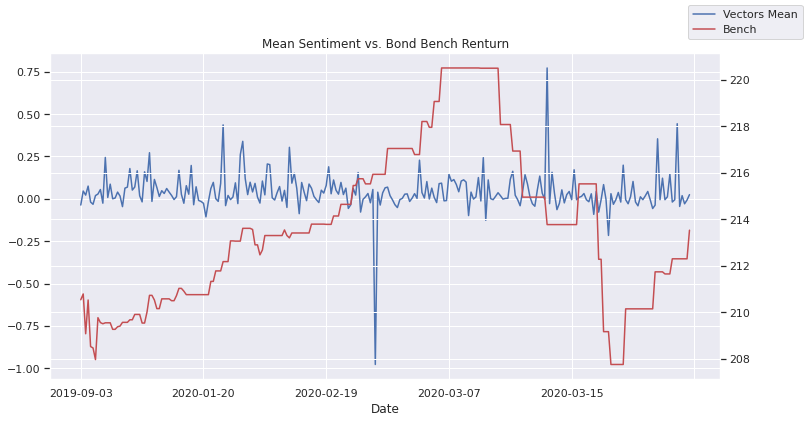

In [17]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12,6)})

# draw the picture of vectors with dim = 100 and bench index
df_seaborn = df_get_vector[['Date','Vectors','Bench']]
ax = df_seaborn.plot(x="Date", y="Vectors", legend=False)
ax.set_title("Sentiment vs. Bond Bench Renturn")
ax2 = ax.twinx()
df_seaborn.plot(x="Date", y="Bench", ax=ax2, legend=False, color="r")
ax.figure.legend()

# print the date of extreme condition
date_list = df_seaborn['Date'].tolist()
bench_list = df_seaborn['Bench'].tolist()
index_bench = bench_list.index(max(bench_list))
vector_list = df_seaborn['Vectors'].tolist()
index_vector =  vector_list.index(min(vector_list))
print("bench peak index: ", date_list[index_bench])
print("vector trough index: ", date_list[index_vector])
print("===============================")

date_list = df_seaborn['Date'].tolist()
bench_list = df_seaborn['Bench'].tolist()
index_bench = bench_list.index(min(bench_list))
vector_list = df_seaborn['Vectors'].tolist()
index_vector =  vector_list.index(max(vector_list))
print("bench trough index: ", date_list[index_bench])
print("vector peak index: ", date_list[index_vector])

# draw the picture of vectors with dim = 100 and bench index
df_seaborn = df_get_vector[['Date','Vectors Mean','Bench']]
ax3 = df_seaborn.plot(x="Date", y="Vectors Mean", legend=False)
ax3.set_title("Mean Sentiment vs. Bond Bench Renturn")
ax4 = ax3.twinx()
df_seaborn.plot(x="Date", y="Bench", ax=ax4, legend=False, color="r")
ax3.figure.legend()


plt.show()


In [18]:
# get word vectors from pre-trained model from Facebook
# dim = 80
import numpy as np

fasttext.util.reduce_model(ft, 80) # 降到80維
ft.get_dimension()

df_get_vector['Vectors'] = 0
df_get_vector['Vectors Mean'] = 0
err = []

for i in range(len(df_get_vector)):
  sum1 = 0
  text_list = df_get_vector.loc[i,'Text']
  
  for j in range(len(text_list)):
    try:
      sum1 += ft.get_word_vector(text_list[j]) # a sparse matrix
    except Exception as e :
      print(i," ",e)
      err.append(text_list[j])

  df_get_vector.loc[i,'Vectors'] = sum1.sum()
  df_get_vector.loc[i,'Vectors Mean'] = np.mean(sum1)
df_get_vector

,Date,Text,Vectors,Vectors Mean,Bench
0,2019-09-03,"[pension, fund, going, destroyed, recession, a...",-23.496679,-0.293709,210.54
1,2019-09-04,"[big, short, michael, burry, explains, index, ...",-20.803360,-0.260042,210.79
2,2019-09-29,"[fund, recommendation, vanguard, hello, r/inve...",-7.159386,-0.089492,209.08
3,2019-10-08,"[index, fund, invest, trillion, rarely, challe...",-36.818466,-0.460231,210.53
4,2019-10-21,"[netflix, raise, billion, debt, fund, massive,...",-4.231838,-0.052898,208.53
5,2019-11-05,"[wsb, trader, us, robinhood, margin, exploit, ...",-13.550890,-0.169386,208.47
6,2019-11-07,"[wework, uber, cost, softbank, vision, fund, q...",-0.510848,-0.006386,207.97
7,2019-11-27,"['esg, ethics-based, fund, hold, major, invest...",-29.161285,-0.364516,209.77
8,2019-12-09,"[til, vanguard, prime, money, market, fund, vm...",-20.715088,-0.258939,209.56
9,2019-12-10,"[invest, etf, index, fund, hand, afford, minim...",-22.041283,-0.275516,209.51


bench peak index:  2020-03-06
vector trough index:  2020-03-18
bench trough index:  2020-03-19
vector peak index:  2020-01-20


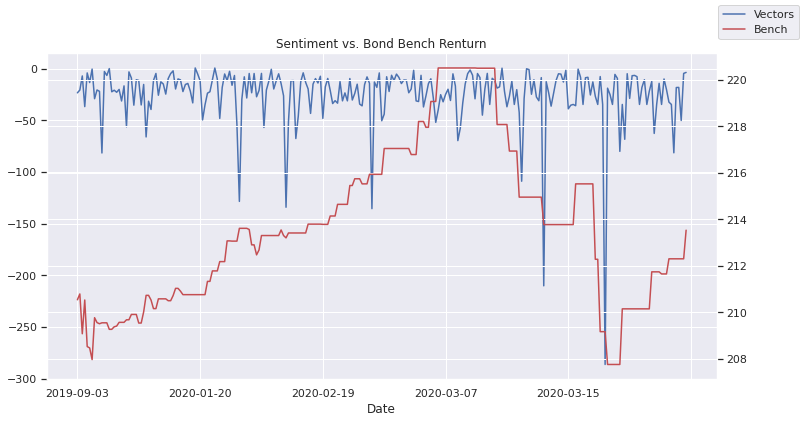

In [19]:

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12,6)})

# draw the picture of vectors with dim = 80 and bench index
df_seaborn = df_get_vector[['Date','Vectors','Bench']]
ax = df_seaborn.plot(x="Date", y="Vectors", legend=False)
ax.set_title("Sentiment vs. Bond Bench Renturn")
ax2 = ax.twinx()
df_seaborn.plot(x="Date", y="Bench", ax=ax2, legend=False, color="r")
ax.figure.legend()

# print the date of extreme condition
date_list = df_seaborn['Date'].tolist()
bench_list = df_seaborn['Bench'].tolist()
index_bench = bench_list.index(max(bench_list))
vector_list = df_seaborn['Vectors'].tolist()
index_vector =  vector_list.index(min(vector_list))
print("bench peak index: ", date_list[index_bench])
print("vector trough index: ", date_list[index_vector])
print("===============================")

date_list = df_seaborn['Date'].tolist()
bench_list = df_seaborn['Bench'].tolist()
index_bench = bench_list.index(min(bench_list))
vector_list = df_seaborn['Vectors'].tolist()
index_vector =  vector_list.index(max(vector_list))
print("bench trough index: ", date_list[index_bench])
print("vector peak index: ", date_list[index_vector])

plt.show()


目前看起來 Dimension = 100 最好

Dim = 80 語意向量幾乎都是負數

之前試過 Dim = 300 效果也不好
